In [ ]:
'''
1- Please log on to kaggle.com and see the German Traffic Sign Dataset,
train your model to recognize all the signs, and create a website or 
cell phone app to predict the sign if you point your cell phone camera to 
a traffic sign in Germany or a website when you upload a traffic sign image.

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
'''

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [4]:
df_train = df_train.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis = 1)
df_train.head()


,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [5]:
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [6]:
df_test = df_test.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis = 1)

In [30]:
df_train['Path'].loc[0]

'Train/20/00020_00000_00000.png'

In [12]:
import cv2

images_array = []
label = []

#for path in df_train['Path']:
for i in range(len(df_train)):
    path = df_train['Path'].loc[i]   
    #print(path)
    image = cv2.imread(path)
    #print(image)
    img_array = Image.fromarray(image,'RGB')
    resize_img = img_array.resize((50,50))
    images_array.append(np.array(resize_img))
    label.append(df_train['ClassId'].loc[i])

In [13]:
import cv2

images_array_t = []
label_t = []

#for path in df_train['Path']:
for i in range(len(df_test)):
    path = df_test['Path'].loc[i]   
    #print(path)
    image = cv2.imread(path)
    #print(image)
    img_array = Image.fromarray(image,'RGB')
    resize_img = img_array.resize((50,50))
    images_array_t.append(np.array(resize_img))
    label_t.append(df_test['ClassId'].loc[i])

In [14]:
## number of categories
len(df_train['ClassId'].unique())

43

In [15]:
## number of categories
len(df_test['ClassId'].unique())

43

In [16]:
#convert list to array for further processing
# 
X = np.array(images_array)
Y = np.array(label)

X_t = np.array(images_array_t)
Y_t = np.array(label_t)



In [17]:
#combine train and test data set into single data set
X = np.vstack((X, X_t))
#Y = np.vstack((label_np, label_nu))
Y = np.hstack((Y, Y_t))

In [18]:
X.shape, Y.shape

((51839, 50, 50, 3), (51839,))

In [19]:
from tensorflow.keras.utils import to_categorical

# Convert y_train to one-hot encoded format
Y = to_categorical(Y, num_classes=43)

In [20]:
# split the data set as train and test
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layers
# input layer size is equal to frame pixel size
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(43, activation='softmax')) 

In [22]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
3733/3733 [==============================] - 59s 16ms/step - loss: 0.0380 - accuracy: 0.7778 - val_loss: 0.0101 - val_accuracy: 0.9460
Epoch 2/10
3733/3733 [==============================] - 57s 15ms/step - loss: 0.0081 - accuracy: 0.9589 - val_loss: 0.0085 - val_accuracy: 0.9631
Epoch 3/10
3733/3733 [==============================] - 58s 15ms/step - loss: 0.0063 - accuracy: 0.9677 - val_loss: 0.0033 - val_accuracy: 0.9822
Epoch 4/10
3733/3733 [==============================] - 61s 16ms/step - loss: 0.0071 - accuracy: 0.9653 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 5/10
3733/3733 [==============================] - 62s 17ms/step - loss: 0.0048 - accuracy: 0.9770 - val_loss: 0.0066 - val_accuracy: 0.9679
Epoch 6/10
3733/3733 [==============================] - 64s 17ms/step - loss: 0.0057 - accuracy: 0.9751 - val_loss: 0.0192 - val_accuracy: 0.9067
Epoch 7/10
3733/3733 [==============================] - 76s 20ms/step - loss: 0.0067 - accuracy: 0.9718 - val_loss: 0.0056 -

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

324/324 - 4s - loss: 0.0051 - accuracy: 0.9821 - 4s/epoch - 11ms/step
Test Accuracy: 0.9820601940155029


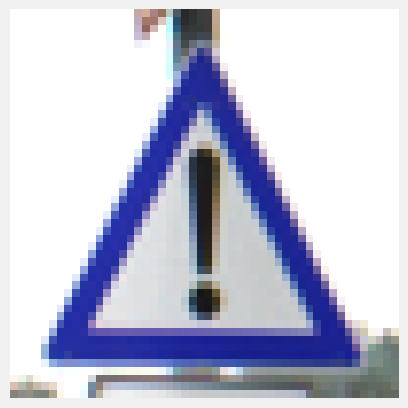

1/1 [==============================] - 0s 16ms/step
CNN model:
18
Actual category:
18


In [31]:
#TEST
#infected test
import random
r_index = random.randint(0, len(X))
plt.imshow(X[r_index])
plt.axis('off')  # Turn off the axis
plt.show()

out_nn = np.argmax( model.predict(X[r_index].reshape(1,50,50,3))) 
print("CNN model:")
print(out_nn)
# sigmoid function will result 1 for this value
print("Actual category:")
out_tt = np.argmax(Y[r_index])
print(out_tt)

In [37]:
import tensorflow as tf
from flask import Flask, render_template, request

In [38]:
# Save the model to a file
model.save('capstone.h5')